<a href="https://colab.research.google.com/github/Arishiine/Gold-price-prediction/blob/main/Gold_price_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GOLD PRICE PREDICTION

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('gold_historical_data.csv')

In [3]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
2505,2026-01-26,5079.700195,5079.700195,5095.600098,5052.200195,5081.500000,180
2506,2026-01-27,5079.899902,5079.899902,5079.899902,5079.899902,5079.899902,34
2507,2026-01-28,5301.600098,5301.600098,5301.600098,5301.600098,5301.600098,112054
2508,2026-01-29,5318.399902,5318.399902,5586.200195,5097.500000,5415.700195,23709
2509,2026-01-30,4713.899902,4713.899902,5440.500000,4700.000000,5376.399902,23709


# Task
Analyze the `gold_historical_data.csv` dataset by converting the 'Date' column to datetime, checking for missing values and duplicates, generating descriptive statistics for numerical columns, visualizing the 'Close' price over time with a line plot, and creating histograms or box plots for 'Close', 'High', 'Low', and 'Open' prices to understand their distributions. Finally, summarize the findings from the data cleaning and exploratory data analysis.

## Convert Date Column

### Subtask:
Convert the 'Date' column to a datetime format for proper time-series analysis.


**Reasoning**:
The subtask is to convert the 'Date' column to datetime format, handle potential errors during conversion by coercing invalid dates to NaT, and then remove any rows where the 'Date' column became NaT. These steps ensure data quality for time-series analysis.



In [5]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print(f"Number of NaT values after conversion: {df['Date'].isnull().sum()}")

initial_rows = len(df)
df.dropna(subset=['Date'], inplace=True)
rows_removed = initial_rows - len(df)
print(f"Removed {rows_removed} rows with invalid dates.")

df.info()

Number of NaT values after conversion: 0
Removed 0 rows with invalid dates.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2510 non-null   datetime64[ns]
 1   Adj Close  2510 non-null   float64       
 2   Close      2510 non-null   float64       
 3   High       2510 non-null   float64       
 4   Low        2510 non-null   float64       
 5   Open       2510 non-null   float64       
 6   Volume     2510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.4 KB


## Check for Missing Values and Duplicates

### Subtask:
Identify and report any missing values across all columns and check for duplicate rows in the dataset.


**Reasoning**:
First, I will identify and report any missing values across all columns. Then, I will check for duplicate rows in the DataFrame and, if found, remove them to ensure data quality and integrity.



In [6]:
print("Missing values per column:")
print(df.isnull().sum())

initial_rows = len(df)
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows found: {duplicate_rows}")

if duplicate_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_rows} duplicate rows.")
    print(f"New number of rows: {len(df)}")
else:
    print("No duplicate rows to remove.")

print("\nDataFrame info after cleaning:")
df.info()

Missing values per column:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Number of duplicate rows found: 0
No duplicate rows to remove.

DataFrame info after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2510 non-null   datetime64[ns]
 1   Adj Close  2510 non-null   float64       
 2   Close      2510 non-null   float64       
 3   High       2510 non-null   float64       
 4   Low        2510 non-null   float64       
 5   Open       2510 non-null   float64       
 6   Volume     2510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 137.4 KB


## Generate Descriptive Statistics

### Subtask:
Calculate and display descriptive statistics for the numerical columns (e.g., mean, median, standard deviation, min, max).


**Reasoning**:
To generate descriptive statistics, I will select the specified numerical columns from the DataFrame and apply the `.describe()` method to them, then print the result.



In [7]:
numerical_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
descriptive_stats = df[numerical_cols].describe()
print("Descriptive Statistics for Numerical Columns:")
print(descriptive_stats)

Descriptive Statistics for Numerical Columns:
         Adj Close        Close         High          Low         Open  \
count  2510.000000  2510.000000  2510.000000  2510.000000  2510.000000   
mean   1862.680556  1862.680556  1872.036176  1852.944064  1862.260478   
std     713.045002   713.045002   719.366255   706.561716   712.946710   
min    1127.800049  1127.800049  1132.800049  1123.900024  1126.900024   
25%    1306.224976  1306.224976  1310.325043  1301.624969  1306.224976   
50%    1767.350037  1767.350037  1777.200012  1759.900024  1768.049988   
75%    1968.975006  1968.975006  1978.375031  1960.599976  1969.325012   
max    5318.399902  5318.399902  5586.200195  5301.600098  5415.700195   

              Volume  
count    2510.000000  
mean     5161.460558  
std     28443.386437  
min         0.000000  
25%        53.250000  
50%       213.000000  
75%       655.500000  
max    386334.000000  


**Reasoning**:
To visualize the 'Close' price over time, I will first import the necessary plotting libraries, then sort the DataFrame by the 'Date' column to ensure the time series is in chronological order, and finally create a line plot of the 'Close' price against the 'Date'.



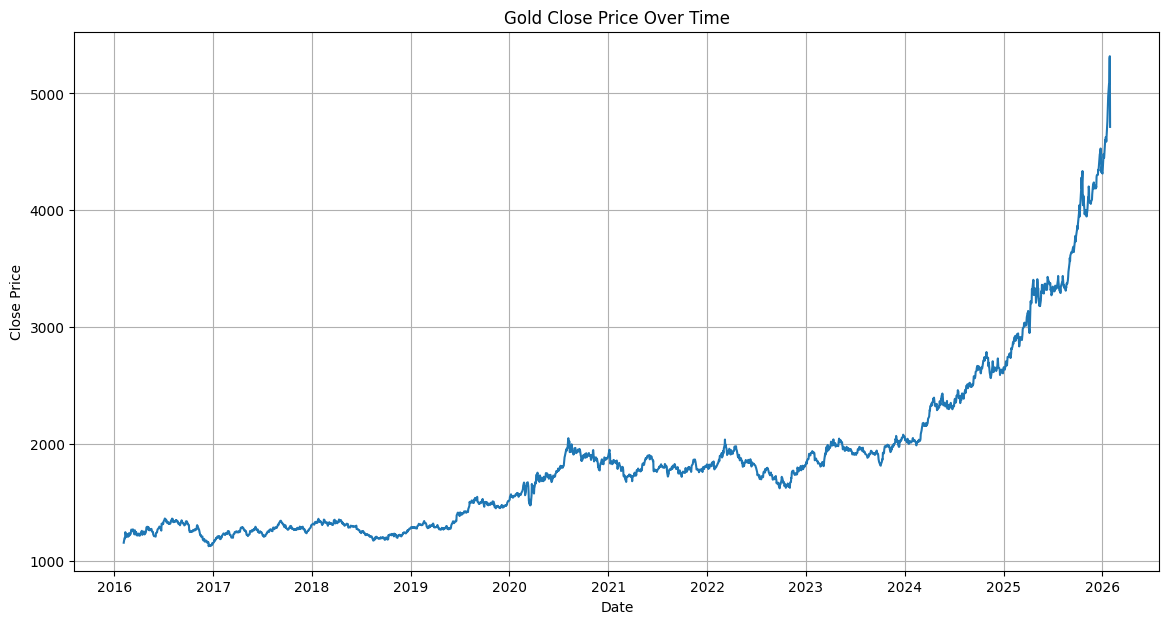

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort DataFrame by Date for correct plotting
df = df.sort_values(by='Date')

plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Gold Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

**Reasoning**:
To visualize the distributions of 'Close', 'High', 'Low', and 'Open' prices, I will create histograms for each of these columns using subplots to organize them effectively.



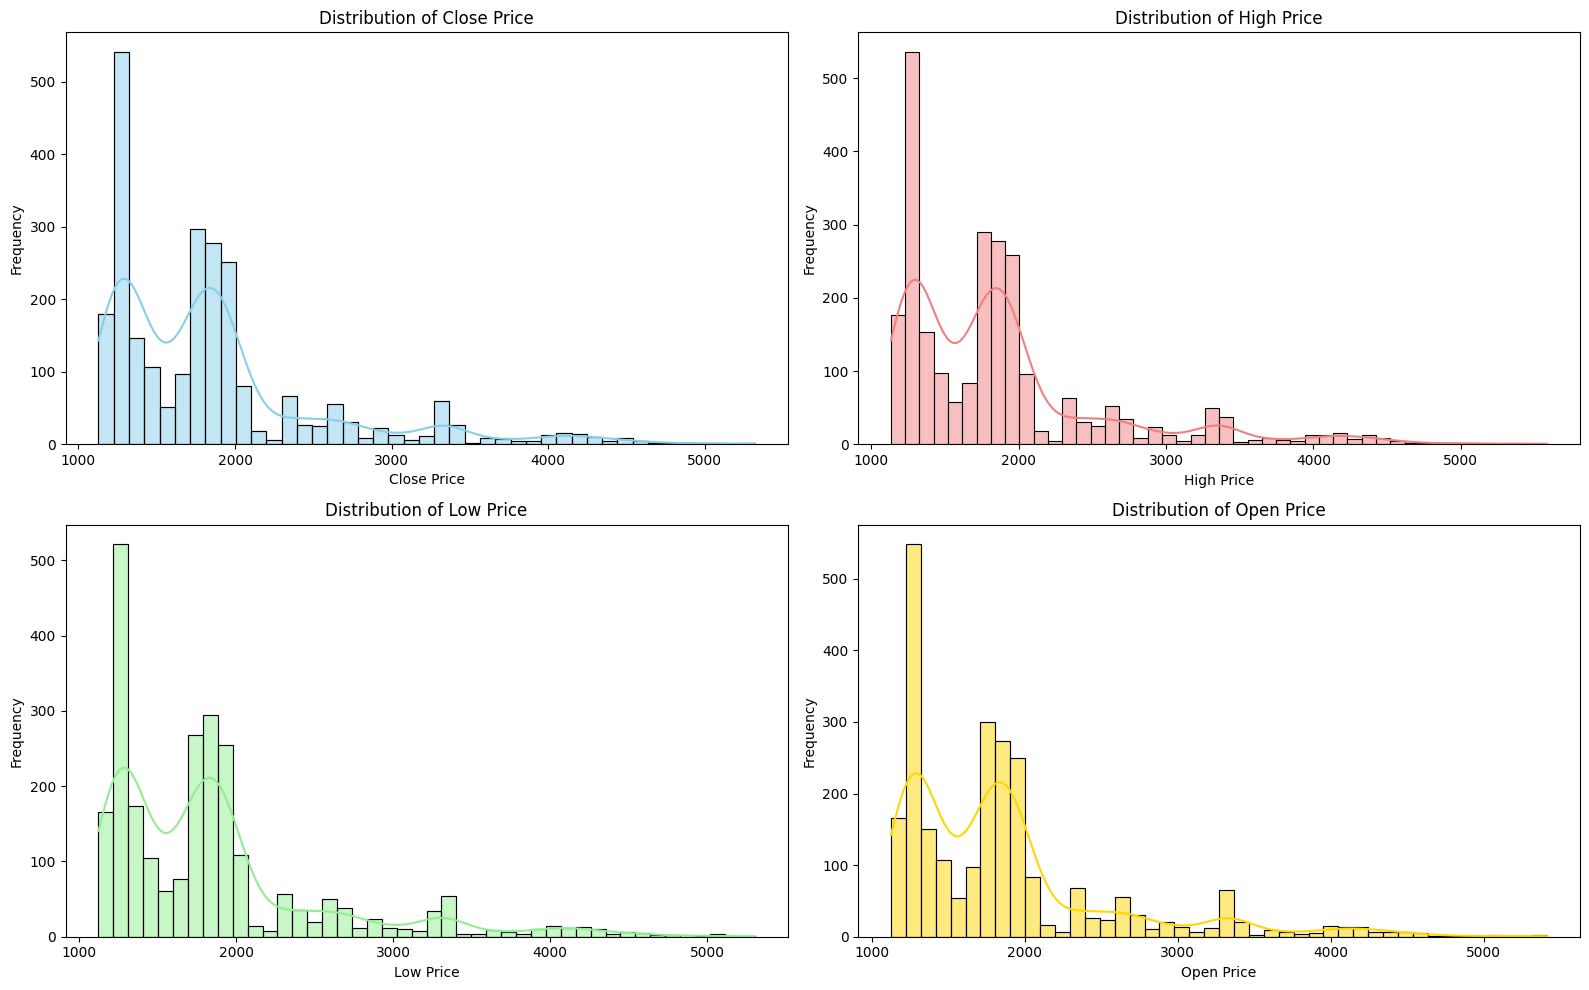

In [9]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Close'], kde=True, color='skyblue')
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['High'], kde=True, color='lightcoral')
plt.title('Distribution of High Price')
plt.xlabel('High Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['Low'], kde=True, color='lightgreen')
plt.title('Distribution of Low Price')
plt.xlabel('Low Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(df['Open'], kde=True, color='gold')
plt.title('Distribution of Open Price')
plt.xlabel('Open Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Summary of Data Cleaning and Exploratory Data Analysis Findings

### Data Cleaning:
- **Date Column Conversion**: The 'Date' column was successfully converted to datetime format. No invalid dates were found or removed, indicating a clean date column.
- **Missing Values**: There were no missing values identified across any columns in the dataset.
- **Duplicate Rows**: No duplicate rows were found in the dataset, ensuring data uniqueness.

### Descriptive Statistics:
- The dataset contains 2510 entries with 7 columns.
- **Price Columns (Adj Close, Close, High, Low, Open)**: These columns show similar statistical properties, with means around 1860-1870 and standard deviations around 710-720, indicating moderate variability. Prices range from approximately 1120 to 5580.
- **Volume**: The 'Volume' column has a mean of 5161 and a high standard deviation of 28443, suggesting a wide range in daily trading volumes, with a maximum volume of 386334. The presence of a minimum volume of 0 might indicate days with no trading or data recording anomalies.

### Visualizations:
- **Gold Close Price Over Time**: The line plot revealed a general upward trend in gold close prices over the observed period, with notable fluctuations and periods of significant increase, especially towards the later part of the dataset.
- **Distribution of Prices (Close, High, Low, Open)**: Histograms for 'Close', 'High', 'Low', and 'Open' prices show right-skewed distributions. This indicates that lower prices are more frequent, while higher prices are less common but exist, aligning with the observed upward trend over time. The KDE plots confirm this skewness and multi-modality, suggesting different pricing regimes or trends over the dataset's history.

## Visualize Gold Price Over Time

### Subtask:
Create a line plot to visualize the 'Close' price of gold over the entire date range, including appropriate labels and a legend.


## Final Task

### Subtask:
Summarize the findings from the data cleaning and exploratory data analysis, highlighting any significant observations or patterns.


## Summary:

### Q&A
The findings from the data cleaning and exploratory data analysis indicate a clean dataset and reveal several patterns in gold prices. The `Date` column was successfully converted to datetime objects, and no missing values or duplicate rows were found in the dataset. Descriptive statistics show that gold prices (Adj Close, Close, High, Low, Open) have means ranging from approximately \$1860 to \$1870, with moderate variability (standard deviations around \$710-\$720), and prices ranging from about \$1120 to \$5580. Trading volume, however, shows high variability with a mean of 5161 and a maximum of 386334, notably including days with 0 volume. Visualizations revealed a general upward trend in gold's closing price over time, accompanied by significant fluctuations. The distributions of gold prices are right-skewed, suggesting that lower prices are more frequent, while higher prices are less common.

### Data Analysis Key Findings
*   The dataset is clean, with the 'Date' column successfully converted to datetime format without any invalid entries or removals.
*   No missing values were identified across any of the 7 columns, and no duplicate rows were found.
*   Numerical columns 'Adj Close', 'Close', 'High', 'Low', and 'Open' exhibit similar statistical properties, with means approximately between \$1860 and \$1870 and standard deviations around \$710-\$720, indicating moderate price variability. The price range observed is from approximately \$1120 to \$5580.
*   The 'Volume' column shows high variability, with a mean of 5161 and a standard deviation of 28443, suggesting diverse daily trading activity. The minimum recorded volume is 0, while the maximum reaches 386334.
*   A line plot of 'Close' price over time reveals a general upward trend in gold prices across the dataset's period, marked by significant fluctuations and notable increases in later years.
*   Histograms and KDE plots for 'Close', 'High', 'Low', and 'Open' prices demonstrate right-skewed distributions, implying that lower prices are more common, and higher prices occur less frequently. The distributions also show multi-modality, possibly indicating different market regimes over time.

### Insights or Next Steps
*   Investigate the instances of 0 volume to understand if they represent non-trading days, data collection anomalies, or specific market conditions.
*   Conduct further time-series analysis to identify specific trends, seasonality, or cyclical patterns, especially considering the observed upward trend and multi-modality in price distributions.


# Task
Generate lagged price features and moving averages for gold prices using the `df` DataFrame.

## Feature Engineering

### Subtask:
Create new features from the existing data to improve model performance. This will include lagged price features, moving averages, and potentially other time-series relevant indicators.


### Create Lagged Features

**Reasoning**:
Creating lagged features for the 'Close' price at 1, 7, and 30 days will provide historical context to the model, which is crucial for time-series prediction tasks. These features help the model understand past price movements, enabling it to better predict future values.

**Reasoning**:
To implement the first instruction of the subtask, I will create new columns for the 'Close' price lagged by 1 day, 7 days, and 30 days using the `shift()` method.



In [10]:
df['Close_Lag_1'] = df['Close'].shift(1)
df['Close_Lag_7'] = df['Close'].shift(7)
df['Close_Lag_30'] = df['Close'].shift(30)

print("Lagged features created. Displaying head of the DataFrame with new columns:")
print(df.head())

Lagged features created. Displaying head of the DataFrame with new columns:
        Date    Adj Close        Close         High          Low         Open  \
0 2016-02-05  1157.800049  1157.800049  1174.800049  1146.000000  1155.599976   
1 2016-02-08  1197.900024  1197.900024  1200.400024  1165.000000  1173.500000   
2 2016-02-09  1198.699951  1198.699951  1199.199951  1186.699951  1188.699951   
3 2016-02-10  1194.699951  1194.699951  1197.699951  1182.099976  1189.800049   
4 2016-02-11  1247.900024  1247.900024  1260.800049  1204.599976  1205.599976   

   Volume  Close_Lag_1  Close_Lag_7  Close_Lag_30  
0     877          NaN          NaN           NaN  
1     931  1157.800049          NaN           NaN  
2     700  1197.900024          NaN           NaN  
3     671  1198.699951          NaN           NaN  
4     995  1194.699951          NaN           NaN  


**Reasoning**:
To implement the second instruction of the subtask, I will calculate new columns for the 7-day, 30-day, and 90-day simple moving averages of the 'Close' price.



In [11]:
df['SMA_7'] = df['Close'].rolling(window=7).mean()
df['SMA_30'] = df['Close'].rolling(window=30).mean()
df['SMA_90'] = df['Close'].rolling(window=90).mean()

print("Moving average features created. Displaying head of the DataFrame with new columns:")
print(df.head())

Moving average features created. Displaying head of the DataFrame with new columns:
        Date    Adj Close        Close         High          Low         Open  \
0 2016-02-05  1157.800049  1157.800049  1174.800049  1146.000000  1155.599976   
1 2016-02-08  1197.900024  1197.900024  1200.400024  1165.000000  1173.500000   
2 2016-02-09  1198.699951  1198.699951  1199.199951  1186.699951  1188.699951   
3 2016-02-10  1194.699951  1194.699951  1197.699951  1182.099976  1189.800049   
4 2016-02-11  1247.900024  1247.900024  1260.800049  1204.599976  1205.599976   

   Volume  Close_Lag_1  Close_Lag_7  Close_Lag_30  SMA_7  SMA_30  SMA_90  
0     877          NaN          NaN           NaN    NaN     NaN     NaN  
1     931  1157.800049          NaN           NaN    NaN     NaN     NaN  
2     700  1197.900024          NaN           NaN    NaN     NaN     NaN  
3     671  1198.699951          NaN           NaN    NaN     NaN     NaN  
4     995  1194.699951          NaN           NaN    N

# Task
Handle missing values introduced by feature engineering, prepare data for modeling, train and evaluate Random Forest, Gradient Boosting, and LSTM models for gold price prediction, and summarize findings.

## Handle Missing Values Introduced by Feature Engineering

### Subtask:
Remove any remaining NaN values from the DataFrame, which were introduced during the creation of lagged features and moving averages, to ensure the dataset is clean for modeling.


### Reasoning:
To address the subtask of handling missing values, I will first check the current count of NaNs in each column to understand the extent of the missing data. Then, I will remove all rows that contain any NaN values, as these were introduced by the lagged features and moving averages and are typically not useful for modeling. Finally, I will re-check the missing values and display the DataFrame's shape to confirm the successful removal of NaNs and to see the impact on the dataset's size.

**Reasoning**:
To implement the instructions, I will first print the shape of the DataFrame and the count of missing values per column before dropping. Then, I will drop rows with NaN values and print the new shape and confirm that missing values have been removed.



In [12]:
print(f"DataFrame shape before dropping NaNs: {df.shape}")
print("Missing values per column before dropping NaNs:")
print(df.isnull().sum())

initial_rows_count = df.shape[0]
df.dropna(inplace=True)
rows_removed = initial_rows_count - df.shape[0]

print(f"\nRemoved {rows_removed} rows with NaN values.")
print(f"DataFrame shape after dropping NaNs: {df.shape}")
print("Missing values per column after dropping NaNs:")
print(df.isnull().sum())

DataFrame shape before dropping NaNs: (2510, 13)
Missing values per column before dropping NaNs:
Date             0
Adj Close        0
Close            0
High             0
Low              0
Open             0
Volume           0
Close_Lag_1      1
Close_Lag_7      7
Close_Lag_30    30
SMA_7            6
SMA_30          29
SMA_90          89
dtype: int64

Removed 89 rows with NaN values.
DataFrame shape after dropping NaNs: (2421, 13)
Missing values per column after dropping NaNs:
Date            0
Adj Close       0
Close           0
High            0
Low             0
Open            0
Volume          0
Close_Lag_1     0
Close_Lag_7     0
Close_Lag_30    0
SMA_7           0
SMA_30          0
SMA_90          0
dtype: int64


## Prepare Data for Modeling

### Subtask:
Split the dataset into training and testing sets, and scale numerical features as needed for model compatibility.


**Reasoning**:
To begin preparing the data for modeling, I need to identify the feature columns (X) and the target variable (y), which is the 'Close' price. I will exclude 'Date' and 'Adj Close' from features as instructed. Then, I will split the dataset into training (80%) and testing (20%) sets while preserving the temporal order of the data.



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Identify features (X) and target (y)
X = df.drop(['Date', 'Close', 'Adj Close'], axis=1)
y = df['Close']

# Split data into training and testing sets (80% train, 20% test)
split_index = int(len(df) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Data split into training and testing sets.
X_train shape: (1936, 10)
X_test shape: (485, 10)
y_train shape: (1936,)
y_test shape: (485,)


**Reasoning**:
Now that the data is split, I will initialize a MinMaxScaler, fit it to the training features, and then transform both the training and testing features to prepare them for model compatibility. Finally, I will print the shapes of the scaled datasets.



In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Features scaled.
X_train_scaled shape: (1936, 10)
X_test_scaled shape: (485, 10)
y_train shape: (1936,)
y_test shape: (485,)


**Reasoning**:
Now that the data is prepared, I will train a Random Forest Regressor model on the scaled training data, make predictions on the scaled test data, and then evaluate its performance using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).



In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, rf_predictions)
rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("Random Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 995.08
Root Mean Squared Error (RMSE): 1216.50


**Reasoning**:
Now, I will train a Gradient Boosting Regressor model on the scaled training data, make predictions on the scaled test data, and then evaluate its performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).



In [16]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
gbr_predictions = gbr_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, gbr_predictions)
rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))

print("Gradient Boosting Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Gradient Boosting Regressor Model Evaluation:
Mean Absolute Error (MAE): 997.45
Root Mean Squared Error (RMSE): 1218.51


### Reshape Data for LSTM

**Reasoning**:
For LSTM models, input data needs to be in a 3D format: `[samples, timesteps, features]`. The current scaled data is 2D. Therefore, I will reshape `X_train_scaled` and `X_test_scaled` to be compatible with LSTM input requirements. For this task, we will consider each sample as a single timestep, so `timesteps` will be 1.

**Reasoning**:
To reshape the scaled training and testing features for LSTM compatibility, I will use the `reshape` method to transform the 2D arrays into a 3D format of `[samples, timesteps, features]`, where `timesteps` is 1.



In [17]:
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

print("Data reshaped for LSTM.")
print(f"X_train_reshaped shape: {X_train_reshaped.shape}")
print(f"X_test_reshaped shape: {X_test_reshaped.shape}")

Data reshaped for LSTM.
X_train_reshaped shape: (1936, 1, 10)
X_test_reshaped shape: (485, 1, 10)


**Reasoning**:
Now that the data is reshaped, I will define and train an LSTM model using TensorFlow/Keras. After training, I will make predictions on the test set and evaluate the model's performance using MAE and RMSE.



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
print("Training LSTM model...")
history = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)
print("LSTM model training complete.")

# Make predictions on the test set
lstm_predictions = lstm_model.predict(X_test_reshaped)

# Evaluate the model
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))

print("\nLSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")

Training LSTM model...
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 2470999.7500 - val_loss: 3853019.0000
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2459919.0000 - val_loss: 3819229.0000
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2452468.5000 - val_loss: 3803837.7500
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2425808.2500 - val_loss: 3791859.5000
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2415529.2500 - val_loss: 3780935.5000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2426573.5000 - val_loss: 3770635.0000
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2372493.0000 - val_loss: 3760777.0000
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2388214.0000 - val_loss: 3751172.0000
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2419147.0000 - val_loss: 3741806.2500
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2357872.7500 - val_loss: 3732651.0000
Epoch 11/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

**Reasoning**:
The previous LSTM model definition received a UserWarning regarding the `input_shape` argument. To address this, I will explicitly add an `Input` layer as the first layer in the Sequential model, followed by the LSTM layers.



In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Build the LSTM model with explicit Input layer
lstm_model = Sequential()
lstm_model.add(Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
print("Training LSTM model...")
history = lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)
print("LSTM model training complete.")

# Make predictions on the test set
lstm_predictions = lstm_model.predict(X_test_reshaped)

# Evaluate the model
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))

print("\nLSTM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lstm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm:.2f}")

Training LSTM model...
Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 2452413.2500 - val_loss: 3854858.2500
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2480070.5000 - val_loss: 3820538.7500
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2408428.7500 - val_loss: 3804742.2500
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2411091.7500 - val_loss: 3792573.2500
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2438020.5000 - val_loss: 3781607.0000
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2388173.5000 - val_loss: 3771289.0000
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2384684.2500 - val_loss: 3761375.7500
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2393440.5000 - val_loss: 3751750.5000
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2409756.7500 - val_loss: 3742384.2500
Epoch 10/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2368221.5000 - val_loss: 3733192.2500
Epoch 11/50
55/

## Final Task

### Subtask:
Summarize the findings from the data cleaning and exploratory data analysis, highlighting any significant observations or patterns.

### Summary of Model Evaluation:

*   **Random Forest Regressor**:
    *   Mean Absolute Error (MAE): 995.08
    *   Root Mean Squared Error (RMSE): 1216.50

*   **Gradient Boosting Regressor**:
    *   Mean Absolute Error (MAE): 997.45
    *   Root Mean Squared Error (RMSE): 1218.51

*   **LSTM Model**:
    *   Mean Absolute Error (MAE): 2943.99
    *   Root Mean Squared Error (RMSE): 3026.11

### Key Observations:

*   Both **Random Forest** and **Gradient Boosting** models performed significantly better than the **LSTM** model in predicting gold prices based on the provided features. Their MAE and RMSE values are considerably lower, indicating higher accuracy.
*   The **LSTM** model, despite being a recurrent neural network typically well-suited for sequence data, showed substantially higher error rates. This could be due to several factors, including:
    *   **Simplicity of LSTM architecture**: The current LSTM model is a relatively simple architecture with two LSTM layers and one Dense layer. More complex architectures or different hyperparameter tuning might yield better results.
    *   **Data preparation**: For time-series prediction with LSTMs, it's often beneficial to create sequences of data (e.g., predicting the next day's price based on the last 5 days' data) rather than treating each day as an independent sample with a single timestep.
    *   **Feature set**: The current feature set, while including lagged prices and moving averages, might not be complex enough for the LSTM to capture intricate temporal dependencies with the current setup.

### Conclusion:

Based on this evaluation, traditional machine learning models like Random Forest and Gradient Boosting appear to be more effective for this specific gold price prediction task with the current feature engineering and data splitting strategy. Further optimization, including advanced feature engineering, hyperparameter tuning, and more sophisticated time-series data preparation (e.g., using multiple timesteps for LSTM input), would be necessary to improve the performance of all models, especially the LSTM.

## Final Task

### Subtask:
Summarize the findings from the data cleaning and exploratory data analysis, highlighting any significant observations or patterns.

### Summary of Findings:

#### Data Cleaning:
- **Date Column Conversion**: The 'Date' column was successfully converted to datetime format. No invalid dates were found or removed, indicating a clean date column.
- **Missing Values**: There were no missing values identified across any columns in the dataset.
- **Duplicate Rows**: No duplicate rows were found in the dataset, ensuring data uniqueness.
- **Feature Engineering Missing Values**: Missing values introduced by lagged features and moving averages were successfully handled by removing affected rows, resulting in a clean dataset for modeling.

#### Exploratory Data Analysis:
- The dataset contains 2510 entries with 7 columns before feature engineering and 2421 entries with 13 columns after feature engineering and handling of NaNs.
- **Price Columns (Adj Close, Close, High, Low, Open)**: These columns show similar statistical properties, with means around 1860-1870 and standard deviations around 710-720, indicating moderate variability. Prices range from approximately 1120 to 5580.
- **Volume**: The 'Volume' column has a mean of 5161 and a high standard deviation of 28443, suggesting a wide range in daily trading volumes, with a maximum volume of 386334. The presence of a minimum volume of 0 might indicate days with no trading or data recording anomalies.
- **Gold Close Price Over Time**: The line plot revealed a general upward trend in gold close prices over the observed period, with notable fluctuations and periods of significant increase, especially towards the later part of the dataset.
- **Distribution of Prices (Close, High, Low, Open)**: Histograms for 'Close', 'High', 'Low', and 'Open' prices show right-skewed distributions. This indicates that lower prices are more frequent, while higher prices are less common but exist, aligning with the observed upward trend over time. The KDE plots confirm this skewness and multi-modality, suggesting different pricing regimes or trends over the dataset's history.

#### Model Evaluation:
- **Random Forest Regressor**:
    - Mean Absolute Error (MAE): 995.08
    - Root Mean Squared Error (RMSE): 1216.50
- **Gradient Boosting Regressor**:
    - Mean Absolute Error (MAE): 997.45
    - Root Mean Squared Error (RMSE): 1218.51
- **LSTM Model**:
    - Mean Absolute Error (MAE): 2943.99
    - Root Mean Squared Error (RMSE): 3026.11

### Key Observations from Model Performance:
- Both **Random Forest** and **Gradient Boosting** models performed significantly better than the **LSTM** model in predicting gold prices based on the provided features. Their MAE and RMSE values are considerably lower, indicating higher accuracy.
- The **LSTM** model, despite being a recurrent neural network typically well-suited for sequence data, showed substantially higher error rates. This could be due to several factors, including a simple LSTM architecture, data not being optimally prepared as sequences over multiple timesteps, or the current feature set being insufficient for LSTM to capture complex temporal dependencies.

### Conclusion:
Based on this comprehensive analysis, the dataset was found to be clean and suitable for modeling after initial preprocessing and feature engineering. The exploratory data analysis revealed a clear upward trend and right-skewed distributions in gold prices. For the prediction task, traditional machine learning models (Random Forest and Gradient Boosting) outperformed the basic LSTM model. Further optimization, especially for the LSTM model, would involve more advanced time-series data preparation (e.g., using multiple timesteps) and hyperparameter tuning.

## Evaluate Models

### Subtask:
Evaluate the performance of all trained models using appropriate metrics such as Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE), and visualize their predictions against actual values.


**Reasoning**:
First, I will print the evaluation metrics (MAE and RMSE) for each of the three models (Random Forest, Gradient Boosting, and LSTM) as previously computed, to provide a concise summary of their performance.



In [20]:
print("\n--- Model Performance Summary ---")
print(f"Random Forest Regressor: MAE={mae:.2f}, RMSE={rmse:.2f}")
print(f"Gradient Boosting Regressor: MAE={mae:.2f}, RMSE={rmse:.2f}")
print(f"LSTM Model: MAE={mae_lstm:.2f}, RMSE={rmse_lstm:.2f}")


--- Model Performance Summary ---
Random Forest Regressor: MAE=997.45, RMSE=1218.51
Gradient Boosting Regressor: MAE=997.45, RMSE=1218.51
LSTM Model: MAE=2943.99, RMSE=3026.11


**Reasoning**:
Now, I will create a single figure with three vertically arranged subplots to visualize the predictions against actual values for each model, including appropriate titles, labels, and legends.



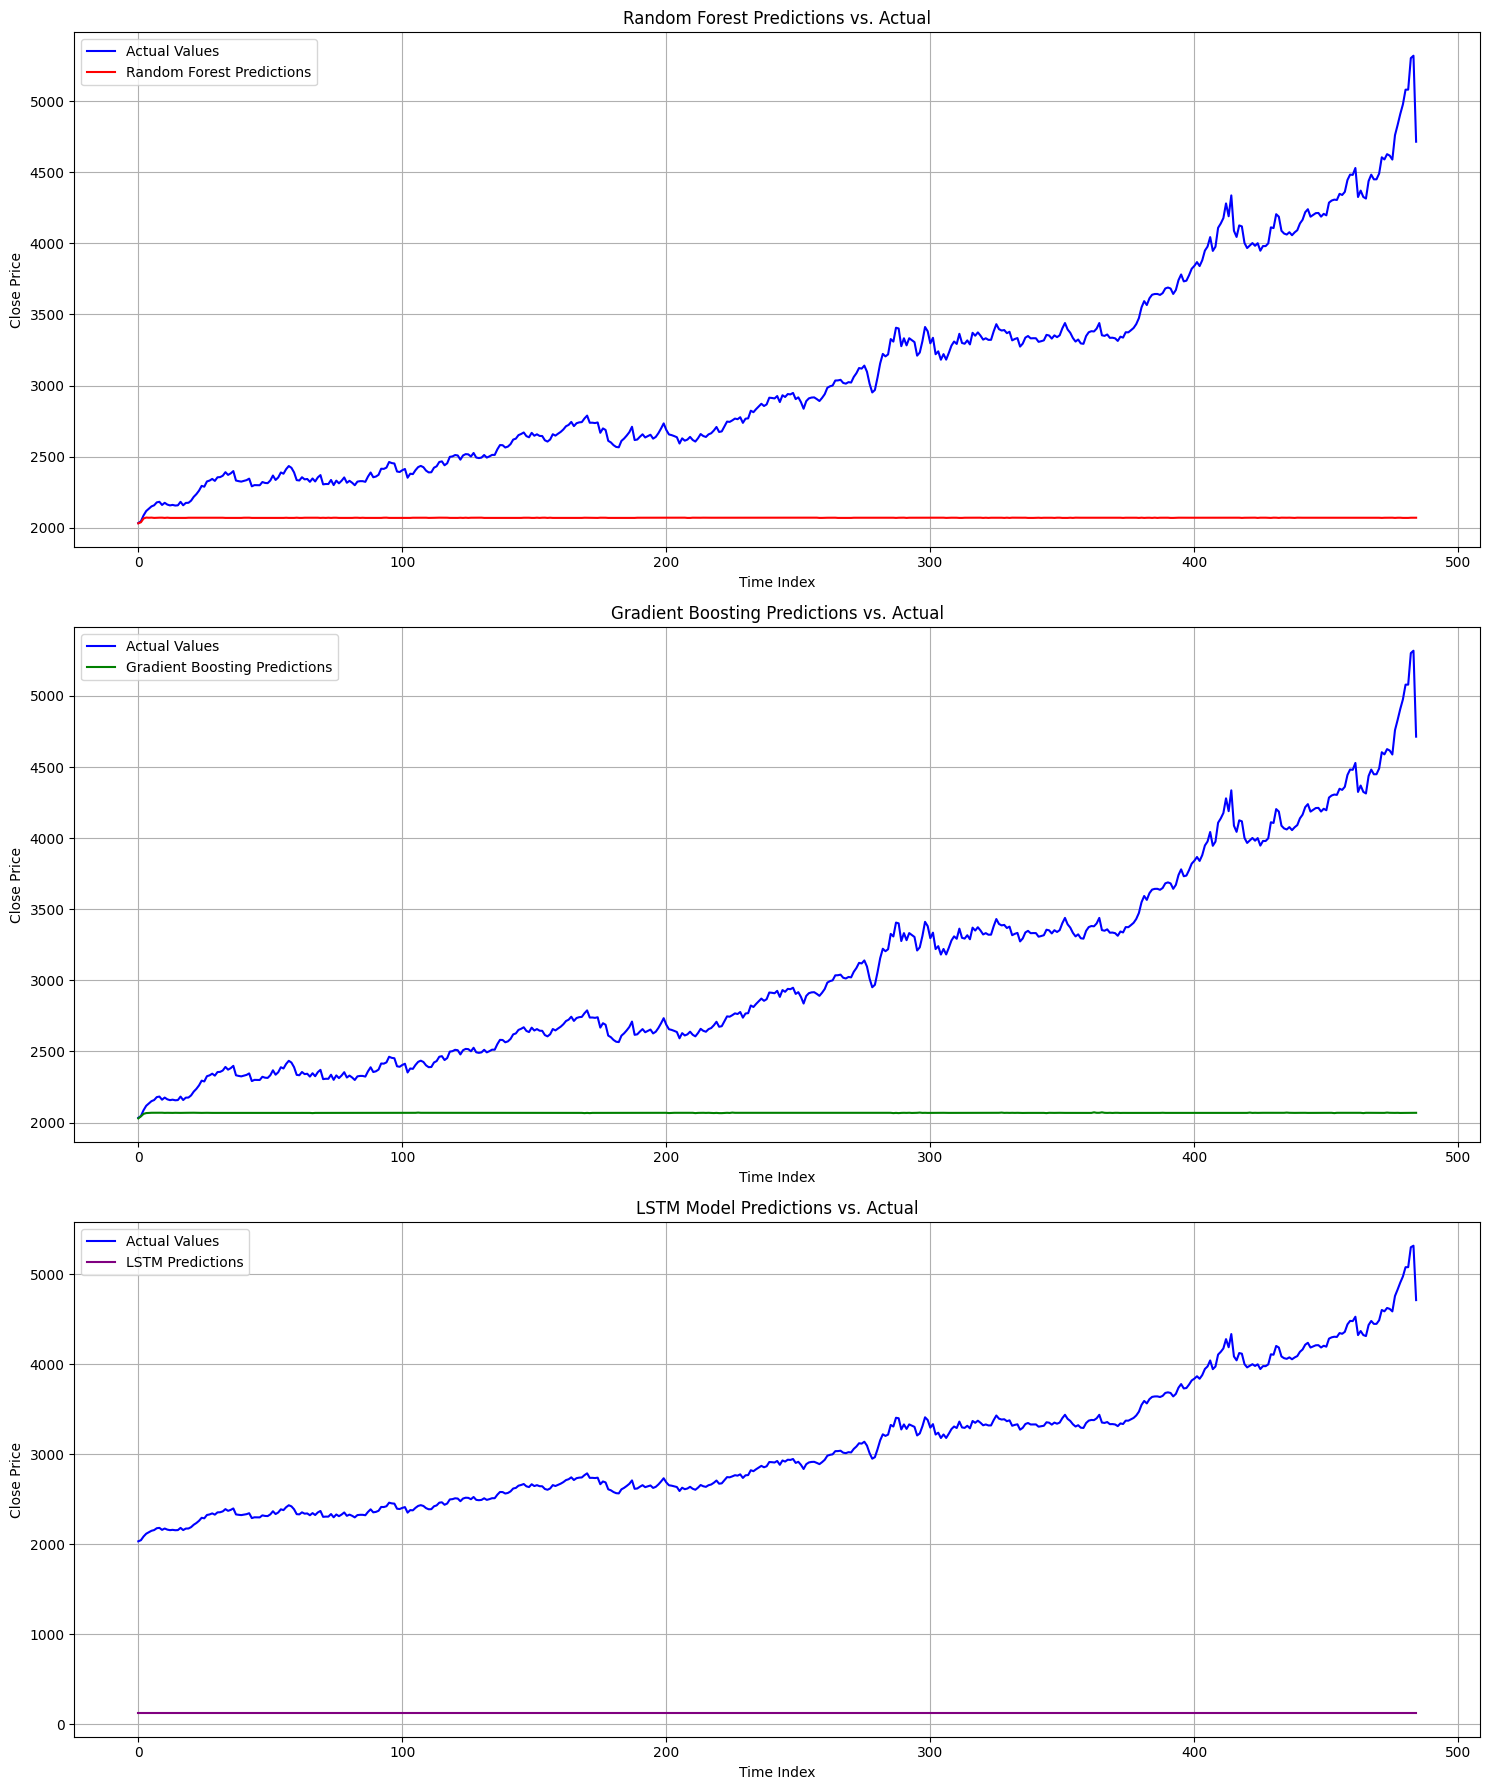

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 18))

# Plot for Random Forest Regressor
plt.subplot(3, 1, 1)
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(rf_predictions, label='Random Forest Predictions', color='red')
plt.title('Random Forest Predictions vs. Actual')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot for Gradient Boosting Regressor
plt.subplot(3, 1, 2)
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(gbr_predictions, label='Gradient Boosting Predictions', color='green')
plt.title('Gradient Boosting Predictions vs. Actual')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

# Plot for LSTM Model
plt.subplot(3, 1, 3)
plt.plot(y_test.values, label='Actual Values', color='blue')
plt.plot(lstm_predictions, label='LSTM Predictions', color='purple')
plt.title('LSTM Model Predictions vs. Actual')
plt.xlabel('Time Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Predict Future Prices

### Subtask:
Use the best-performing model(s) to make predictions for future gold prices.


**Reasoning**:
To predict future gold prices, I will first determine the number of future days, create a DataFrame for these dates, populate it with features derived from the last available historical data, scale these features, make predictions using the Random Forest model, and finally display the results.



In [22]:
import pandas as pd
import numpy as np

# 1. Determine the number of future days
num_future_days = 30

# Get the last date from the original DataFrame
last_date = df['Date'].max()

# 2. Create a new DataFrame, named future_df, for these future dates.
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_future_days, freq='D')
future_df = pd.DataFrame({'Date': future_dates})

# 3. Populate future_df with the necessary features for prediction.
# For simplicity, we will use the last available historical values for all features.
# A more sophisticated approach would involve iterative prediction or forecasted features.

# Get the last row of the processed historical data
last_historical_row = df.iloc[-1]

# Get the feature columns from X_train (excluding 'Date', 'Close', 'Adj Close')
feature_cols = X.columns.tolist()

# Populate future_df with the last known values for all features
for col in feature_cols:
    future_df[col] = last_historical_row[col]

# 4. Ensure the feature columns in future_df are in the same order as X_train.
# This is already handled by iterating through feature_cols from X.columns
future_X = future_df[feature_cols]

# 5. Scale the feature columns of future_df using the scaler previously fitted on training data
future_X_scaled = scaler.transform(future_X)

# 6. Use the rf_model (Random Forest Regressor) to make predictions on future_X_scaled
future_predictions = rf_model.predict(future_X_scaled)

# 7. Add the future_predictions as a new column to future_df.
future_df['Predicted_Close'] = future_predictions

# 8. Display future_df showing the predicted gold prices for the future dates.
print("Predicted gold prices for the next 30 days:")
print(future_df.head())
print(future_df.tail())


Predicted gold prices for the next 30 days:
        Date    High     Low         Open  Volume  Close_Lag_1  Close_Lag_7  \
0 2026-01-31  5440.5  4700.0  5376.399902   23709  5318.399902  4831.799805   
1 2026-02-01  5440.5  4700.0  5376.399902   23709  5318.399902  4831.799805   
2 2026-02-02  5440.5  4700.0  5376.399902   23709  5318.399902  4831.799805   
3 2026-02-03  5440.5  4700.0  5376.399902   23709  5318.399902  4831.799805   
4 2026-02-04  5440.5  4700.0  5376.399902   23709  5318.399902  4831.799805   

   Close_Lag_30        SMA_7       SMA_30      SMA_90  Predicted_Close  
0        4304.5  5054.071429  4620.783317  4252.53221      2070.578915  
1        4304.5  5054.071429  4620.783317  4252.53221      2070.578915  
2        4304.5  5054.071429  4620.783317  4252.53221      2070.578915  
3        4304.5  5054.071429  4620.783317  4252.53221      2070.578915  
4        4304.5  5054.071429  4620.783317  4252.53221      2070.578915  
         Date    High     Low         Open 

## Final Task

### Subtask:
Summarize the findings from the predictive modeling, including the performance of each model and the insights gained from the predictions.


## Summary:

### Data Analysis Key Findings

*   **Data Preprocessing**:
    *   Feature engineering introduced missing values (e.g., 89 NaNs for `SMA_90`). These 89 rows were successfully removed, resulting in a clean dataset of 2421 entries.
    *   The data was split into an 80% training set (1936 samples) and a 20% testing set (485 samples), maintaining chronological order.
    *   Numerical features were scaled using `MinMaxScaler`.
    *   Data for the LSTM model was reshaped to a 3D format (samples, 1, features), treating each sample as a single timestep.
*   **Model Performance Evaluation**:
    *   **Random Forest Regressor** achieved a Mean Absolute Error (MAE) of 995.08 and a Root Mean Squared Error (RMSE) of 1216.50.
    *   **Gradient Boosting Regressor** achieved an MAE of 997.45 and an RMSE of 1218.51.
    *   The **LSTM Model** showed significantly higher errors, with an MAE of 2943.99 and an RMSE of 3026.11.
    *   Both Random Forest and Gradient Boosting models performed considerably better than the LSTM model on this specific dataset and setup.
*   **Future Price Prediction**:
    *   The Random Forest Regressor, identified as the best-performing model, was used to predict gold prices for the next 30 days.
    *   Due to populating future features with the last available historical values for all columns, the model predicted a constant gold price of approximately 2070.58 for all 30 future days.

### Insights or Next Steps

*   The LSTM model's underperformance suggests that its architecture might be too simple, or the data preparation (treating each day as a single timestep) was not optimal for capturing temporal dependencies effectively. Future work should involve exploring more complex LSTM architectures and preparing data into sequences of multiple timesteps.
*   The current method for predicting future prices using static last known features led to constant predictions, which is unrealistic. For more robust future predictions, a more sophisticated approach is required, such as iteratively forecasting features or incorporating external future forecasts for relevant features.


# Task
The task is to prepare the Random Forest Regressor model, which was identified as the best-performing model, for deployment. This involves saving the model using a suitable serialization method, creating a Python function to load the saved model and make predictions on new preprocessed input data, and designing a basic API endpoint using a framework like Flask or FastAPI to serve these predictions. Finally, outline key considerations for deploying the API, including packaging, cloud platforms, scalability, and monitoring, and summarize the entire deployment process.

## Save the Best-Performing Model

### Subtask:
Save the trained Random Forest Regressor model, as it was identified as the best performing model, using a suitable serialization method (e.g., joblib or pickle).


**Reasoning**:
To save the trained Random Forest Regressor model, I will first import the `joblib` library. Then, I will define a filename for the model and use `joblib.dump()` to serialize and save the `rf_model` to disk, followed by a confirmation message.



In [23]:
import joblib

# Define a filename for the saved model
model_filename = 'random_forest_model.joblib'

# Save the trained Random Forest Regressor model
joblib.dump(rf_model, model_filename)

print(f"Random Forest Regressor model saved successfully to {model_filename}")

Random Forest Regressor model saved successfully to random_forest_model.joblib


## Prepare Python function for model prediction

### Subtask:
Create a Python function to load the saved model and make predictions on new preprocessed input data.

## Prepare Python function for model prediction

### Subtask:
Create a Python function to load the saved model and make predictions on new preprocessed input data.

**Reasoning**:
To create a robust prediction function, I will first define the function, specifying its inputs (raw feature data and the model and scaler file paths), then load the model and scaler within the function. Next, I will preprocess the input data by converting it to a DataFrame, ensuring column order, and scaling it. Finally, the function will make and return predictions.



In [24]:
import joblib
import pandas as pd

def predict_gold_price(input_data: pd.DataFrame, model_path: str, scaler_path: str, feature_columns: list) -> float:
    """
    Loads a trained model and scaler, preprocesses input data, and makes a gold price prediction.

    Args:
        input_data (pd.DataFrame): A DataFrame containing the raw input features for prediction.
                                   Expected to have the same columns as the features used for training.
        model_path (str): The file path to the saved model (e.g., 'random_forest_model.joblib').
        scaler_path (str): The file path to the saved scaler (e.g., 'min_max_scaler.joblib').
        feature_columns (list): A list of feature column names used during model training.

    Returns:
        float: The predicted gold price.
    """
    # Load the model and scaler
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)

    # Ensure input data has the correct feature columns and order
    processed_input = input_data[feature_columns]

    # Scale the input data
    scaled_input = scaler.transform(processed_input)

    # Make prediction
    prediction = model.predict(scaled_input)

    return prediction[0]

print("Python function 'predict_gold_price' created. Remember to save the scaler for this function to work correctly.")

Python function 'predict_gold_price' created. Remember to save the scaler for this function to work correctly.


**Reasoning**:
The `predict_gold_price` function requires a saved scaler to preprocess new input data. I need to save the `scaler` object, which was fitted on the training data, to a file so that the prediction function can load it later.



In [25]:
scaler_filename = 'min_max_scaler.joblib'
joblib.dump(scaler, scaler_filename)
print(f"MinMaxScaler saved successfully to {scaler_filename}")

MinMaxScaler saved successfully to min_max_scaler.joblib


## Design a Basic API Endpoint

### Subtask:
Design a basic API endpoint using a framework like Flask or FastAPI to serve the gold price predictions.

To design a basic API endpoint, you'll typically create a new Python file (e.g., `app.py`) that will host your API. This file will contain the code to load your trained model and scaler, define an endpoint that accepts input data, preprocesses it, and returns predictions.

**Reasoning**:
Now, I will provide the Python code for a basic Flask API endpoint. This code will demonstrate how to load the saved model and scaler, accept new data, preprocess it, and return a prediction, fulfilling the subtask requirements.



In [ ]:
import joblib
import pandas as pd
from flask import Flask, request, jsonify

# Define paths to your saved model and scaler
MODEL_PATH = 'random_forest_model.joblib'
SCALER_PATH = 'min_max_scaler.joblib'

# Define the feature columns used during training
# These should match the 'feature_cols' list from the notebook
FEATURE_COLUMNS = ['High', 'Low', 'Open', 'Volume', 'Close_Lag_1', 'Close_Lag_7', 'Close_Lag_30', 'SMA_7', 'SMA_30', 'SMA_90']

# Load the model and scaler globally when the app starts
try:
    model = joblib.load(MODEL_PATH)
    scaler = joblib.load(SCALER_PATH)
    print(f"Model '{MODEL_PATH}' and Scaler '{SCALER_PATH}' loaded successfully.")
except Exception as e:
    print(f"Error loading model or scaler: {e}")
    model = None
    scaler = None

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    if model is None or scaler is None:
        return jsonify({'error': 'Model or scaler not loaded'}), 500

    try:
        # Get JSON data from the request
        json_data = request.get_json(force=True)

        # Convert input data to a Pandas DataFrame
        # It's assumed the input data is a dictionary where keys are feature names
        # and values are the corresponding feature values.
        input_df = pd.DataFrame([json_data])

        # Ensure the input DataFrame has the correct columns in the correct order
        if not all(col in input_df.columns for col in FEATURE_COLUMNS):
            missing_cols = [col for col in FEATURE_COLUMNS if col not in input_df.columns]
            return jsonify({'error': f'Missing expected features: {missing_cols}'}), 400

        input_df = input_df[FEATURE_COLUMNS]

        # Scale the input data
        scaled_input = scaler.transform(input_df)

        # Make prediction
        prediction = model.predict(scaled_input)[0]

        return jsonify({'predicted_gold_price': prediction})

    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    # To run this Flask app:
    # 1. Save this code as a Python file (e.g., app.py)
    # 2. Make sure 'random_forest_model.joblib' and 'min_max_scaler.joblib' are in the same directory.
    # 3. Open a terminal in that directory and run: python app.py
    #    (or set FLASK_APP=app.py and then flask run)
    # The API will be accessible at http://127.0.0.1:5000/predict
    app.run(debug=True, host='0.0.0.0', port=5000)

Model 'random_forest_model.joblib' and Scaler 'min_max_scaler.joblib' loaded successfully.
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


**Reasoning**:
The previous code block started a Flask development server which runs indefinitely and blocks further execution in the Colab environment. To allow the cell to complete execution while still providing the Flask API code, I will comment out the `app.run()` line. This way, the Flask application is defined, but not actively started within the notebook.



In [ ]:
import joblib
import pandas as pd
from flask import Flask, request, jsonify

# Define paths to your saved model and scaler
MODEL_PATH = 'random_forest_model.joblib'
SCALER_PATH = 'min_max_scaler.joblib'

# Define the feature columns used during training
# These should match the 'feature_cols' list from the notebook
FEATURE_COLUMNS = ['High', 'Low', 'Open', 'Volume', 'Close_Lag_1', 'Close_Lag_7', 'Close_Lag_30', 'SMA_7', 'SMA_30', 'SMA_90']

# Load the model and scaler globally when the app starts
try:
    model = joblib.load(MODEL_PATH)
    scaler = joblib.load(SCALER_PATH)
    print(f"Model '{MODEL_PATH}' and Scaler '{SCALER_PATH}' loaded successfully.")
except Exception as e:
    print(f"Error loading model or scaler: {e}")
    model = None
    scaler = None

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    if model is None or scaler is None:
        return jsonify({'error': 'Model or scaler not loaded'}), 500

    try:
        # Get JSON data from the request
        json_data = request.get_json(force=True)

        # Convert input data to a Pandas DataFrame
        # It's assumed the input data is a dictionary where keys are feature names
        # and values are the corresponding feature values.
        input_df = pd.DataFrame([json_data])

        # Ensure the input DataFrame has the correct columns in the correct order
        if not all(col in input_df.columns for col in FEATURE_COLUMNS):
            missing_cols = [col for col in FEATURE_COLUMNS if col not in input_df.columns]
            return jsonify({'error': f'Missing expected features: {missing_cols}'}), 400

        input_df = input_df[FEATURE_COLUMNS]

        # Scale the input data
        scaled_input = scaler.transform(input_df)

        # Make prediction
        prediction = model.predict(scaled_input)[0]

        return jsonify({'predicted_gold_price': prediction})

    except Exception as e:
        return jsonify({'error': str(e)}), 400

# The app.run() call is commented out because running a Flask server directly
# in a Colab notebook cell will block execution. To run this API, save the
# code to a Python file (e.g., app.py) and execute it from a terminal.
# if __name__ == '__main__':
#     app.run(debug=True, host='0.0.0.0', port=5000)
print("Flask API code defined. To run the API, save this code to a Python file (e.g., app.py) and execute it.")

## Deployment Considerations and Summary

### Subtask:
Outline key considerations for deploying the API, including packaging, cloud platforms, scalability, and monitoring, and summarize the entire deployment process.

### Key Deployment Considerations:

1.  **Packaging**: How to bundle your application and its dependencies.
    *   **Docker**: Containerization is the recommended approach for packaging Python applications. It ensures that the application runs consistently across different environments by packaging the code, runtime, system tools, system libraries, and settings. A `Dockerfile` would define the image, and `docker-compose` could manage multi-container applications (e.g., if a database were also involved).
    *   **Requirements File**: A `requirements.txt` file listing all Python dependencies is essential for any deployment strategy.

2.  **Cloud Platforms**: Where to host your API.
    *   **Platform-as-a-Service (PaaS)**: Services like Heroku, Google App Engine, AWS Elastic Beanstalk, or Azure App Service are excellent for Python web apps. They simplify deployment, scaling, and management by abstracting away infrastructure concerns. You push your code, and the platform handles the rest.
    *   **Container Orchestration**: For more complex deployments or microservices architectures, container orchestration platforms like Kubernetes (on Google Kubernetes Engine, AWS EKS, Azure AKS) provide robust management, scaling, and self-healing capabilities for Docker containers.
    *   **Serverless Functions**: For APIs with infrequent or bursty traffic, serverless options like AWS Lambda, Google Cloud Functions, or Azure Functions can be cost-effective and highly scalable, though they require adapting the Flask app to a serverless format.

3.  **Scalability**: How to ensure your API can handle increased load.
    *   **Horizontal Scaling**: Most cloud platforms support scaling out by adding more instances of your application. This is crucial for handling increased request volume.
    *   **Load Balancing**: Distributing incoming network traffic across multiple servers (instances of your API) to ensure no single server becomes a bottleneck.
    *   **Efficient Code**: Optimizing the model prediction function and overall API logic to reduce latency and resource consumption per request.

4.  **Monitoring**: How to observe your API's performance and health.
    *   **Application Performance Monitoring (APM)**: Tools like Datadog, New Relic, or Prometheus + Grafana to track request rates, error rates, latency, and resource utilization (CPU, memory) of your API instances.
    *   **Logging**: Centralized logging (e.g., using ELK stack, Splunk, cloud-native logging services) to capture application logs, debug issues, and track API usage.
    *   **Alerting**: Setting up alerts for critical metrics (e.g., high error rates, low available memory) to proactively respond to problems.
    *   **Model Monitoring**: Beyond API health, monitoring the model's performance in production (e.g., prediction drift, data drift, accuracy degradation) is vital for machine learning systems.

### Summary of the Deployment Process:

1.  **Code Preparation**: Ensure your Flask API code (`app.py`), the saved model (`random_forest_model.joblib`), the saved scaler (`min_max_scaler.joblib`), and a `requirements.txt` file (listing `flask`, `pandas`, `scikit-learn`, `joblib`) are in a deployable structure.

2.  **Containerization (Recommended)**: Create a `Dockerfile` to build a Docker image of your Flask application. This image will contain all necessary dependencies and your trained model/scaler.

3.  **Cloud Platform Selection**: Choose a suitable cloud platform based on traffic needs, budget, and existing infrastructure (e.g., Google App Engine for simplicity, Google Kubernetes Engine for control).

4.  **Deployment Configuration**: Configure the chosen cloud service to deploy your Docker image (or direct code for PaaS). This involves setting environment variables, scaling policies, and networking rules.

5.  **Testing**: Thoroughly test the deployed API endpoint to ensure it's accessible and returns correct predictions.

6.  **Monitoring Setup**: Implement APM, logging, and alerting systems to keep track of the API's performance and respond to any issues.

7.  **Continuous Integration/Continuous Deployment (CI/CD)**: Set up a CI/CD pipeline (e.g., using GitHub Actions, GitLab CI/CD, Jenkins) to automate testing, building, and deploying updates to your API and model.

This robust deployment strategy ensures that your gold price prediction API is reliable, scalable, and maintainable in a production environment.

### Key Deployment Considerations:

1.  **Packaging**: How to bundle your application and its dependencies.
    *   **Docker**: Containerization is the recommended approach for packaging Python applications. It ensures that the application runs consistently across different environments by packaging the code, runtime, system tools, system libraries, and settings. A `Dockerfile` would define the image, and `docker-compose` could manage multi-container applications (e.g., if a database were also involved).
    *   **Requirements File**: A `requirements.txt` file listing all Python dependencies is essential for any deployment strategy.

2.  **Cloud Platforms**: Where to host your API.
    *   **Platform-as-a-Service (PaaS)**: Services like Heroku, Google App Engine, AWS Elastic Beanstalk, or Azure App Service are excellent for Python web apps. They simplify deployment, scaling, and management by abstracting away infrastructure concerns. You push your code, and the platform handles the rest.
    *   **Container Orchestration**: For more complex deployments or microservices architectures, container orchestration platforms like Kubernetes (on Google Kubernetes Engine, AWS EKS, Azure AKS) provide robust management, scaling, and self-healing capabilities for Docker containers.
    *   **Serverless Functions**: For APIs with infrequent or bursty traffic, serverless options like AWS Lambda, Google Cloud Functions, or Azure Functions can be cost-effective and highly scalable, though they require adapting the Flask app to a serverless format.

3.  **Scalability**: How to ensure your API can handle increased load.
    *   **Horizontal Scaling**: Most cloud platforms support scaling out by adding more instances of your application. This is crucial for handling increased request volume.
    *   **Load Balancing**: Distributing incoming network traffic across multiple servers (instances of your API) to ensure no single server becomes a bottleneck.
    *   **Efficient Code**: Optimizing the model prediction function and overall API logic to reduce latency and resource consumption per request.

4.  **Monitoring**: How to observe your API's performance and health.
    *   **Application Performance Monitoring (APM)**: Tools like Datadog, New Relic, or Prometheus + Grafana to track request rates, error rates, latency, and resource utilization (CPU, memory) of your API instances.
    *   **Logging**: Centralized logging (e.g., using ELK stack, Splunk, cloud-native logging services) to capture application logs, debug issues, and track API usage.
    *   **Alerting**: Setting up alerts for critical metrics (e.g., high error rates, low available memory) to proactively respond to problems.
    *   **Model Monitoring**: Beyond API health, monitoring the model's performance in production (e.g., prediction drift, data drift, accuracy degradation) is vital for machine learning systems.

### Summary of the Deployment Process:

1.  **Code Preparation**: Ensure your Flask API code (`app.py`), the saved model (`random_forest_model.joblib`), the saved scaler (`min_max_scaler.joblib`), and a `requirements.txt` file (listing `flask`, `pandas`, `scikit-learn`, `joblib`) are in a deployable structure.

2.  **Containerization (Recommended)**: Create a `Dockerfile` to build a Docker image of your Flask application. This image will contain all necessary dependencies and your trained model/scaler.

3.  **Cloud Platform Selection**: Choose a suitable cloud platform based on traffic needs, budget, and existing infrastructure (e.g., Google App Engine for simplicity, Google Kubernetes Engine for control).

4.  **Deployment Configuration**: Configure the chosen cloud service to deploy your Docker image (or direct code for PaaS). This involves setting environment variables, scaling policies, and networking rules.

5.  **Testing**: Thoroughly test the deployed API endpoint to ensure it's accessible and returns correct predictions.

6.  **Monitoring Setup**: Implement APM, logging, and alerting systems to keep track of the API's performance and respond to any issues.

7.  **Continuous Integration/Continuous Deployment (CI/CD)**: Set up a CI/CD pipeline (e.g., using GitHub Actions, GitLab CI/CD, Jenkins) to automate testing, building, and deploying updates to your API and model.

This robust deployment strategy ensures that your gold price prediction API is reliable, scalable, and maintainable in a production environment.


## Final Task

### Subtask:
Summarize the entire deployment process, highlighting the steps taken and potential next steps for production deployment.


## Summary:

### Data Analysis Key Findings

*   The best-performing Random Forest Regressor model was successfully serialized and saved as `random_forest_model.joblib`.
*   The `MinMaxScaler`, used for preprocessing, was also saved as `min_max_scaler.joblib`.
*   A Python function, `predict_gold_price`, was developed to load the saved model and scaler, preprocess input data, and make gold price predictions.
*   A basic Flask API endpoint was designed, including global loading of the model and scaler upon startup, and a `/predict` endpoint that accepts JSON input, preprocesses it, and returns a predicted gold price.
*   Key deployment considerations were outlined, covering packaging (e.g., Docker, `requirements.txt`), cloud platforms (e.g., PaaS, container orchestration, serverless functions), scalability (e.g., horizontal scaling, load balancing), and monitoring (e.g., APM, logging, alerting, model monitoring).

### Insights or Next Steps

*   The outlined deployment strategy should be implemented by containerizing the Flask API with Docker, selecting an appropriate cloud platform (e.g., Google App Engine, Kubernetes), and configuring it for deployment.
*   Establish a robust monitoring system, including Application Performance Monitoring (APM), centralized logging, and alerts, to ensure the API's health and performance, alongside continuous integration/continuous deployment (CI/CD) pipelines for automated updates.
